# Stock Prediction - Time Series Analysis

## Steps for Time Series Analysis of Financial Data:

1. **Environment Setup and Data Download**:
   - Configure your environment to access and retrieve the latest stock data.
   - Download the **adjusted close prices** for the following stocks: **FB (Meta Platforms), MMM (3M), IBM, and AMZN (Amazon)** over the last 60 months.

2. **Data Resampling**:
   - Resample the stock data to obtain prices at the end of each **business month**.
   - Focus on the **Adjusted Close** values for analysis.

3. **Autocorrelation Analysis**:
   - Utilize the `pandas` library's `autocorrelation_plot()` function to visualize the autocorrelation of the adjusted month-end close prices for each stock.
   - Interpret the plots to identify patterns and relationships in the time series data.

In [29]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr


# Using pandas datareader and Yahoo Finance
yf.pdr_override()
ticker = ['AMZN', 'FB', 'IBM', 'MMM']


# import the date and time
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta


In [31]:
# Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months
# Getting the data of all tickers

sixty_months_ago = datetime.now() - relativedelta(months=60)

Stock_prices = pdr.get_data_yahoo(ticker, start=('2017-07-19'), end=('2022-07-19'))
Stock_prices


[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
                  AMZN          FB         IBM         MMM        AMZN   
Date                                                                     
2017-07-19   51.343498  164.139999  111.417068  181.179428   51.343498   
2017-07-20   51.435001  164.529999  111.515274  181.478378   51.435001   
2017-07-21   51.283501  164.429993  111.077248  180.376465   51.283501   
2017-07-24   51.947498  166.000000  110.254051  179.385529   51.947498   
2017-07-25   51.993500  165.279999  110.405106  170.322296   51.993500   
...                ...         ...         ...         ...         ...   
2022-07-12  109.220001  163.270004  139.179993  130.199997  109.220001   
2022-07-13  110.400002  163.490005  137.179993  128.369995  110.400002   
2022-07-14  110.629997  158.050003  139.059998  128.309998  110.629997   
2022-07-15  113.550003  164.699997  139.919998  130.130005  113.550003   
2022-07-18  113.760002  167.229996  138.130005  128.910004  113.760002   

                                                      High              ...  \
                    FB         IBM         MMM        AMZN          FB  ...   
Date                                                                    ...   
2017-07-19  164.139999  141.042068  212.100006   51.579498  165.699997  ...   
2017-07-20  164.529999  141.166351  212.449997   51.748501  165.000000  ...   
2017-07-21  164.429993  140.611862  211.160004   51.305000  165.050003  ...   
2017-07-24  166.000000  139.569794  210.000000   52.150501  166.169998  ...   
2017-07-25  165.279999  139.761002  199.389999   52.166500  165.539993  ...   
...                ...         ...         ...         ...         ...  ...   
2022-07-12  163.270004  139.179993  130.199997  113.230003  165.910706  ...   
2022-07-13  163.490005  137.179993  128.369995  111.779999  164.979996  ...   
2022-07-14  158.050003  139.059998  128.309998  111.180000  162.589996  ...   
2022-07-15  164.699997  139.919998  130.130005  115.589996  164.979996  ...   
2022-07-18  167.229996  138.130005  128.910004  117.239998  171.684998  ...   

                   Low                    Open                          \
                   IBM         MMM        AMZN          FB         IBM   
Date                                                                     
2017-07-19  140.258133  211.169998   51.250000  163.589996  143.422562   
2017-07-20  140.564056  212.059998   51.579498  164.800003  141.042068   
2017-07-21  140.066925  209.479996   51.063999  164.160004  141.099426   
2017-07-24  139.388138  210.000000   51.417000  164.639999  140.535370   
2017-07-25  139.608032  197.169998   51.902500  165.009995  140.124283   
...                ...         ...         ...         ...         ...   
2022-07-12  138.570007  129.059998  112.160004  164.800003  140.839996   
2022-07-13  136.800003  127.669998  107.029999  160.160004  137.179993   
2022-07-14  135.020004  125.879997  110.239998  161.220001  135.600006   
2022-07-15  138.610001  128.250000  112.500000  160.539993  140.679993   
2022-07-18  137.779999  128.520004  115.000000  166.750000  140.149994   

                          Volume                               
                   MMM      AMZN        FB       IBM      MMM  
Date                                                           
2017-07-19  211.509995  59280000  26273642  14951106   825300  
2017-07-20  212.210007  61950000  18523107   7543961  1347400  
2017-07-21  211.649994  54692000  14744002   6808937  2246200  
2017-07-24  211.199997  65760000  17366971   4055970  2165200  
2017-07-25  202.649994  48952000  15383241   4402509  6593000  
...                ...       ...       ...       ...      ...  
2022-07-12  129.160004  54280300  16639659   3235400  2638100  
2022-07-13  128.000000  61353800  16555138   4123200  2490300  
2022-07-14  126.980003  51163100  23765168   5298400  2525500  
2022-07-15  129.869995  83891100  23342807   4515500  2638100  


In [32]:
Stock_prices.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-07-19 to 2022-07-18
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1258 non-null   float64
 1   (Adj Close, FB)    1258 non-null   float64
 2   (Adj Close, IBM)   1258 non-null   float64
 3   (Adj Close, MMM)   1258 non-null   float64
 4   (Close, AMZN)      1258 non-null   float64
 5   (Close, FB)        1258 non-null   float64
 6   (Close, IBM)       1258 non-null   float64
 7   (Close, MMM)       1258 non-null   float64
 8   (High, AMZN)       1258 non-null   float64
 9   (High, FB)         1258 non-null   float64
 10  (High, IBM)        1258 non-null   float64
 11  (High, MMM)        1258 non-null   float64
 12  (Low, AMZN)        1258 non-null   float64
 13  (Low, FB)          1258 non-null   float64
 14  (Low, IBM)         1258 non-null   float64
 15  (Low, MMM)         1258 non-null   float64
 16  (Open,

In [33]:

Stock_Adj_Close= Stock_prices['Adj Close']

In [34]:
Stock_Adj_Close

,AMZN,FB,IBM,MMM
Date,,,,
2017-07-19,51.343498,164.139999,111.417068,181.179428
2017-07-20,51.435001,164.529999,111.515274,181.478378
2017-07-21,51.283501,164.429993,111.077248,180.376465
2017-07-24,51.947498,166.000000,110.254051,179.385529
2017-07-25,51.993500,165.279999,110.405106,170.322296
...,...,...,...,...
2022-07-12,109.220001,163.270004,139.179993,130.199997
2022-07-13,110.400002,163.490005,137.179993,128.369995
2022-07-14,110.629997,158.050003,139.059998,128.309998


In [35]:
Stock_Adj_Close.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-07-19 to 2022-07-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1258 non-null   float64
 1   FB      1258 non-null   float64
 2   IBM     1258 non-null   float64
 3   MMM     1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


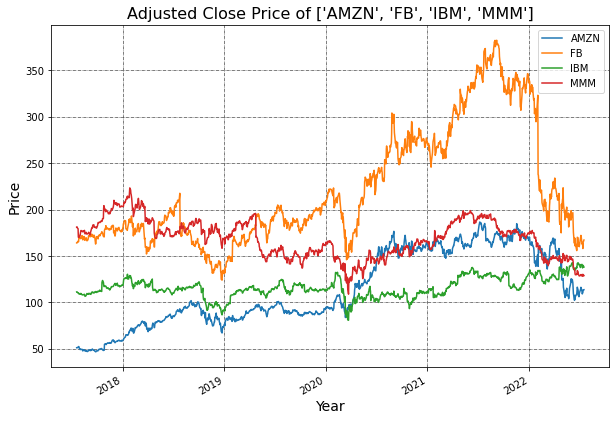

In [36]:
# Plot the adjusted close price
Stock_Adj_Close.plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [37]:
# Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.
Business_Month_Data = Stock_Adj_Close.resample('BM').mean()
Business_Month_Data


,AMZN,FB,IBM,MMM
Date,,,,
2017-07-31,51.481555,166.903332,110.248177,175.121104
2017-08-31,48.571826,169.160000,108.573145,175.532631
2017-09-29,48.449625,170.591000,110.560349,179.555196
2017-10-31,50.036000,173.306820,115.563796,190.573034
2017-11-30,56.990405,179.696667,116.125297,199.270822
...,...,...,...,...
2022-03-31,154.280480,207.260002,125.821540,145.657578
2022-04-29,151.308700,208.235001,129.927407,146.970743
2022-05-31,112.473048,197.740476,133.719115,147.564907


In [38]:
Business_Month_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-29
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    61 non-null     float64
 1   FB      61 non-null     float64
 2   IBM     61 non-null     float64
 3   MMM     61 non-null     float64
dtypes: float64(4)
memory usage: 2.4 KB


In [39]:
AMZN=((Stock_Adj_Close.resample('BM').mean())['AMZN'])
MMM=((Stock_Adj_Close.resample('BM').mean())['MMM'])
FB=((Stock_Adj_Close.resample('BM').mean())['FB'])
IBM=((Stock_Adj_Close.resample('BM').mean())['IBM'])


Text(0.5, 1.0, 'IBM Stock Price')

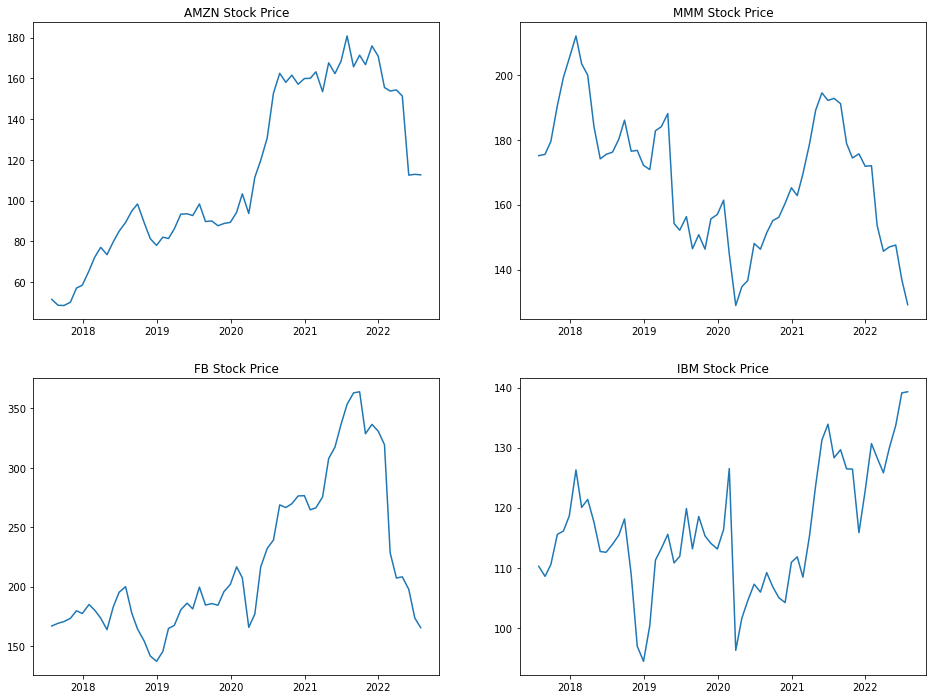

In [40]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.plot(AMZN)
plt.title('AMZN Stock Price')


plt.subplot(2,2,2)
plt.plot(MMM)
plt.title('MMM Stock Price')

plt.subplot(2,2,3)
plt.plot(FB)
plt.title('FB Stock Price')

plt.subplot(2,2,4)
plt.plot(IBM)
plt.title('IBM Stock Price')


In [41]:
# Use pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.


An autocorrelation_plot is a method of measuring and explaining the internal association between the observations with time series by analysing the correlation at a given point of time. If the correlation is +1, it means the variables are positively correlated and the relationship is very strong and positive. And if it is -1, the correlation is strong and negative. A correlation of 0 means there is no relationship between the observations.
In the given assignment, the autocorrelation plot has:
--x axis-This is the lag time period that is observed
--y axis-the correlation of the adjusted close price according to time
The dotted lines indicate the significance of correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant.
In the autocorrelation plot (AMZN) below, it is observed that in the first lag period, there is significant correlation between the adjusted stock price and time. But as the lag time increases, the correlation decreases till lag time period of 19 where there is no correlation. After lag period of 20, the correlation continues to decrease negatively till 35 lag periods. Not much significant correlation is observed after that. 


Text(0.5, 0, 'Lag')

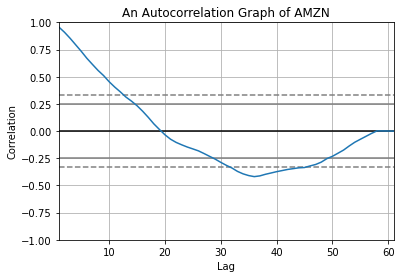

In [42]:
AutoCorrTimePlot = pd.plotting.autocorrelation_plot(AMZN)
AutoCorrTimePlot.set_title("An Autocorrelation Graph of AMZN")
AutoCorrTimePlot.set_ylabel("Correlation")
AutoCorrTimePlot.set_xlabel("Lag")


Text(0.5, 0, 'Lag')

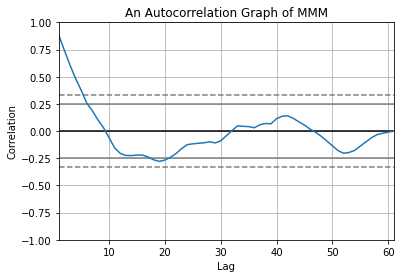

In [43]:
AutoCorrTimePlot = pd.plotting.autocorrelation_plot(MMM)
AutoCorrTimePlot.set_title("An Autocorrelation Graph of MMM")
AutoCorrTimePlot.set_ylabel("Correlation")
AutoCorrTimePlot.set_xlabel("Lag")
# In the autocorrelation plot (MMM) below, it is observed that in the first lag period, there is not much significant correlation (0.85) between the adjusted stock price and time and it continues to decrease further. At lag time of 9, there is 0 correlation and after 20 lag time period, the correlation increases negatively, till it reaches 0 and decreases further.


Text(0.5, 0, 'Lag')

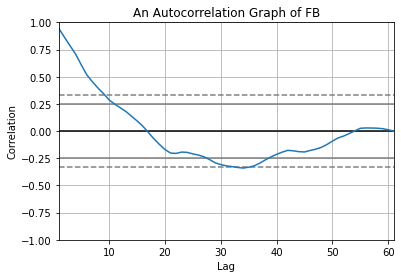

In [44]:
AutoCorrTimePlot = pd.plotting.autocorrelation_plot(FB)
AutoCorrTimePlot.set_title("An Autocorrelation Graph of FB")
AutoCorrTimePlot.set_ylabel("Correlation")
AutoCorrTimePlot.set_xlabel("Lag")
# In the autocorrelation plot (FB) below, it is observed that in the first three years, there is significant correlation between the adjusted stock price and time. But after lag of 9 years, the correlation decreases till lag time period of 30 years. After that, the correlation increases negatively a little bit (negligible), and reaches 0 at lag of 60.Thus, there is no significant correlation.

Text(0.5, 0, 'Lag')

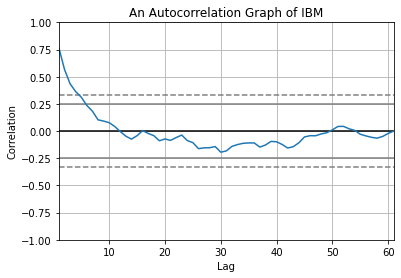

In [45]:
AutoCorrTimePlot = pd.plotting.autocorrelation_plot(IBM)
AutoCorrTimePlot.set_title("An Autocorrelation Graph of IBM")
AutoCorrTimePlot.set_ylabel("Correlation")
AutoCorrTimePlot.set_xlabel("Lag")
#  In the plot, it is observed that in the first year, there is not much significant correlation (0.75) between the adjusted stock price and time and it continues to decrease further. At lag time of 11 years, there is 0 correlation and after that there is no significant correlation between both of them. 

Text(0.5, 0, 'Lag')

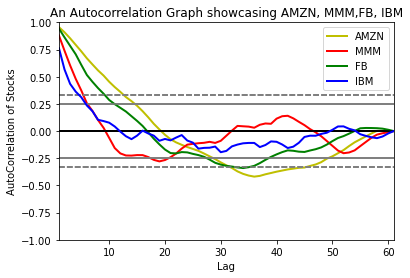

In [46]:
# Collated Graph showing the Autocorrelation of all stock prices
x=pd.plotting.autocorrelation_plot(AMZN, label="AMZN", color='y', linewidth=2)
y=pd.plotting.autocorrelation_plot(MMM, label="MMM", color='r', linewidth=2)
z=pd.plotting.autocorrelation_plot(FB, label="FB", color='g', linewidth=2)
a=pd.plotting.autocorrelation_plot(IBM, label="IBM", color='b', linewidth=2)
x.set_title("An Autocorrelation Graph showcasing AMZN, MMM,FB, IBM")
x.set_ylabel("AutoCorrelation of Stocks")
x.set_xlabel("Lag")

In [47]:
#-monthly returns for each stock using `shift()` function
Monthly_returns=Business_Month_Data/Business_Month_Data.shift(1)-1 
Monthly_returns

,AMZN,FB,IBM,MMM
Date,,,,
2017-07-31,NaN,NaN,NaN,NaN
2017-08-31,-0.056520,0.013521,-0.015193,0.002350
2017-09-29,-0.002516,0.008459,0.018303,0.022916
2017-10-31,0.032743,0.015920,0.045255,0.061362
2017-11-30,0.138988,0.036870,0.004859,0.045640
...,...,...,...,...
2022-03-31,0.003230,-0.092705,-0.019523,-0.051871
2022-04-29,-0.019262,0.004704,0.032632,0.009015
2022-05-31,-0.256665,-0.050398,0.029183,0.004043


As there are 'NaN' values, so there is a need to drop them

In [48]:
Monthly_returns=Monthly_returns.dropna()
Monthly_returns

,AMZN,FB,IBM,MMM
Date,,,,
2017-08-31,-0.056520,0.013521,-0.015193,0.002350
2017-09-29,-0.002516,0.008459,0.018303,0.022916
2017-10-31,0.032743,0.015920,0.045255,0.061362
2017-11-30,0.138988,0.036870,0.004859,0.045640
2017-12-29,0.025472,-0.012689,0.021747,0.029727
2018-01-31,0.119922,0.042535,0.064478,0.033335
2018-02-28,0.101872,-0.025375,-0.049415,-0.040479
2018-03-30,0.067947,-0.037610,0.011072,-0.017083
2018-04-30,-0.046838,-0.055790,-0.031226,-0.079460


Text(0.5, 0, 'Lag')

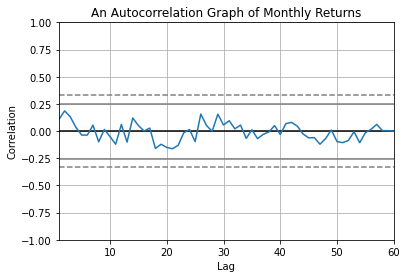

In [49]:
# Autocorrelation plot 
AutoCorr_TimePlot_AMZN = pd.plotting.autocorrelation_plot(Monthly_returns['AMZN'])
AutoCorr_TimePlot_AMZN.set_title("An Autocorrelation Graph of Monthly Returns")
AutoCorr_TimePlot_AMZN.set_ylabel("Correlation")
AutoCorr_TimePlot_AMZN.set_xlabel("Lag")


Returns are the capital measure of a company’s profitability, it is the combination of dividends and the increase in stock price. Using the pandas .shift function, I can shift the column I want down by one month to project the stock price for the next month end. Then, using the appl_monthend_mean/appl_monthend_mean.shift(1)-1 function, I can calculate the returns, which is the return of the previous month, divided by the shift of the month.
By using the autocorrelation function, there is no significant trend seen in the month end returns. The correlation is nearly 0 so the values are randomly distributed, and therefore, it is concluded that the stock price of amazon(AMZN) returns are not affected by the time.

Text(0.5, 0, 'Lag')

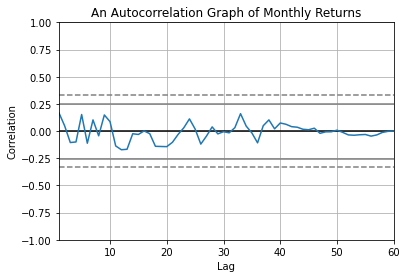

In [50]:
AutoCorr_TimePlot_MMM = pd.plotting.autocorrelation_plot(Monthly_returns['MMM'])
AutoCorr_TimePlot_MMM.set_title("An Autocorrelation Graph of Monthly Returns")
AutoCorr_TimePlot_MMM.set_ylabel("Correlation")
AutoCorr_TimePlot_MMM.set_xlabel("Lag")
# By using the autocorrelation function, there is no significant trend seen in the month end returns. The correlation is nearly 0 so the values are randomly distributed, and therefore, it is concluded that the stock price of MMM returns are not affected by the time.

Text(0.5, 0, 'Lag')

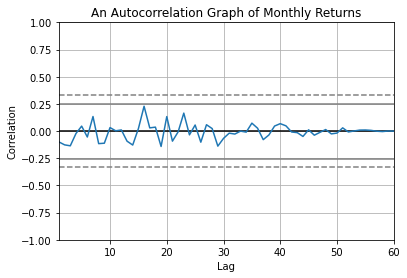

In [51]:
AutoCorr_TimePlot_IBM = pd.plotting.autocorrelation_plot(Monthly_returns['IBM'])
AutoCorr_TimePlot_IBM.set_title("An Autocorrelation Graph of Monthly Returns")
AutoCorr_TimePlot_IBM.set_ylabel("Correlation")
AutoCorr_TimePlot_IBM.set_xlabel("Lag")
# Similar trend of no significance is seen in IBM autocorrelation plot.


Text(0.5, 0, 'Lag')

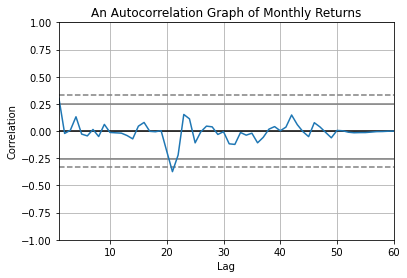

In [52]:
AutoCorr_TimePlot_FB = pd.plotting.autocorrelation_plot(Monthly_returns['FB'])
AutoCorr_TimePlot_FB.set_title("An Autocorrelation Graph of Monthly Returns")
AutoCorr_TimePlot_FB.set_ylabel("Correlation")
AutoCorr_TimePlot_FB.set_xlabel("Lag")
# The autocorrelation plot shows that there is no significant trend seen in the month end returns. The correlation does increase negatively after lag of 19 years but again it reaches 0. 


Text(0.5, 0, 'Lag')

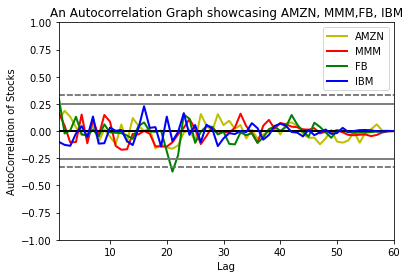

In [53]:
x=pd.plotting.autocorrelation_plot(Monthly_returns['AMZN'], label="AMZN", color='y', linewidth=2)
y=pd.plotting.autocorrelation_plot(Monthly_returns['MMM'], label="MMM", color='r', linewidth=2)
z=pd.plotting.autocorrelation_plot(Monthly_returns['FB'], label="FB", color='g', linewidth=2)
a=pd.plotting.autocorrelation_plot(Monthly_returns['IBM'], label="IBM", color='b', linewidth=2)
x.set_title("An Autocorrelation Graph showcasing AMZN, MMM,FB, IBM")
x.set_ylabel("AutoCorrelation of Stocks")
x.set_xlabel("Lag")


In [54]:
Monthly_returns

,AMZN,FB,IBM,MMM
Date,,,,
2017-08-31,-0.056520,0.013521,-0.015193,0.002350
2017-09-29,-0.002516,0.008459,0.018303,0.022916
2017-10-31,0.032743,0.015920,0.045255,0.061362
2017-11-30,0.138988,0.036870,0.004859,0.045640
2017-12-29,0.025472,-0.012689,0.021747,0.029727
2018-01-31,0.119922,0.042535,0.064478,0.033335
2018-02-28,0.101872,-0.025375,-0.049415,-0.040479
2018-03-30,0.067947,-0.037610,0.011072,-0.017083
2018-04-30,-0.046838,-0.055790,-0.031226,-0.079460


In [55]:
Monthly_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-08-31 to 2022-07-29
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


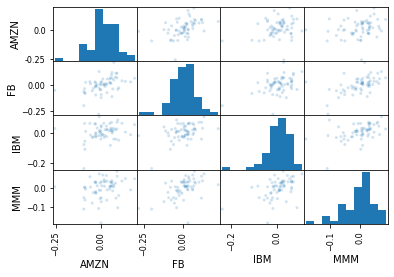

In [56]:
# for correlation use `scatter_matrix()` function from `pandas.plotting`
Scatter_plot_matrix=pd.plotting.scatter_matrix(Monthly_returns, alpha=0.2)

A scatter plot reveals relationships or association between two variables. The relationship between two variables is called correlation. The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship. If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation. If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation. There is no relationship if there is absolutely no correlation present the value given is 0.
Given a set of variables, the scatter plot matrix contains all the pair-wise scatter plots of the variables on a single page in a matrix format. The example shows a 4x4 scatter plot matrix of the variables AMZN, FB, IBM, MMM. 
As seen, NO CORRELATION is observed which is indicated by a loose pattern of plots with no appreciable slope. This indicates that a change in one variable is not necessarily associated with a change in the other variable.For example in this case, an increase in monthly returns of AMZN doesnt result in increase in monthly returns of FB and vice-versa. Similar is the case with other stocks, too. To conclude, Scatter matrix plot analysis of monthly returns of all the stocks shows that there is no correlation between the stocks.